In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

# Initialize the data points.
X = np.array([
    [2, 4],
    [1.7, 2.8],
    [7, 8],
    [8.6, 8],
    [3.4, 1.5],
    [9, 11]
])


In [8]:
def plot_points(X):
    """
    Plots points without clusters.
    """

    plt.scatter(X[:,0], X[:,1], s=150)
    plt.title('Scatter plot before clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [9]:
class KMeans:

    def __init__(self, k):
        """
        Initialize the object.
        """

        self.k = k

    def init_centers(self, X):
        """
        Initialize the random centers.
        """

        # Get the dimension of the dataset.
        m, n = X.shape

        # Create empty centers.
        centers = np.empty([self.k, n])

        for i in range(self.k):

          # Pick the random row from the dataset.
          idx = np.random.randint(m)

          # Set the ith center to the random row.
          centers[i] = X[idx]

        return centers

    def euclidean_distance(self, x, y):
        """
        Compute the Euclidean Distance.
        """
        
        return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

    def fit(self, X):
        """
        Fit the data to create clusters until there is no update to the 
        centers.
        """

        # Initialize the clusters.
        clusters = np.zeros(X.shape[0])

        # Randomly assign centroids.
        centers = self.init_centers(X)

        # Repeat until no change in centroids.
        while True:

            for i, point in enumerate(X):

                # Minimum distance.
                min_dist = float('inf')

                for j, center in enumerate(centers):

                    # Compute the euclidean distance.
                    distance = self.euclidean_distance(center, point)

                    # Select the point with the minimum distance.
                    if min_dist > distance:
                        min_dist = distance
                        clusters[i] = j

            # Update centroids by the mean of the point in the cluster.
            new_centers = pd.DataFrame(X).groupby(by=clusters).mean().values

            # If there is no change in the centroids then break.
            if np.count_nonzero(centers - new_centers) == 0:
                break
            else:
                centers = new_centers

        return centers, clusters

In [10]:
kmeans = KMeans(2)
centers, clusters = kmeans.fit(X)

In [11]:
def plot_clusters(X, cst):
    clusters = {
        '0': [],
        '1': []
    }

    for i in range(len(cst)):

      clusters[str(int(cst[i]))].append(X[i])

    c1 = np.array(clusters['0']).reshape(-1, 2)
    c2 = np.array(clusters['1']).reshape(-1, 2)

    plt.scatter(c1[:, 0], c1[:, 1], s=150)
    plt.scatter(c2[:, 0], c2[:, 1], s=150)
    plt.title('Scatter plot after clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


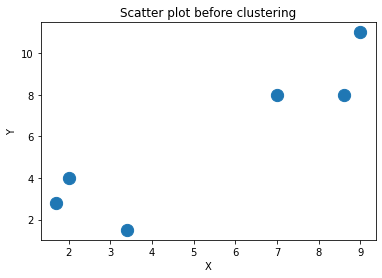

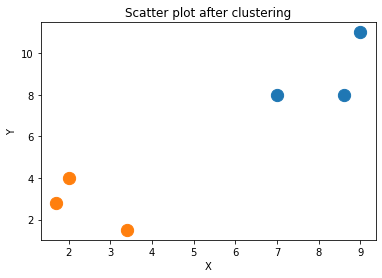

In [12]:
# Plot the datapoints.
plot_points(X)
plot_clusters(X, clusters)